## Sustitución por un valor arbitrario con Scikit-learn ==> SimpleImputer 

En la libreria de Scikit-learn hay una clase para manejar una gran variedad de métodos de sustitución.

El **SimpleImputer** es una clase que provee una funcionalidad básica para la sustitutición de valores ausentes, incluyendo:

- Sustitución por la media y la mediana para variables numéricas
- Sustutución por la categoría más frecuente para variables categóricas.
- Sustitución por valores arbitrarios para variables numéricas y categóricas.

### Ventajas

- Facil de usar si se aplica a todo el dataframe
- Código mantenido por desarolladores de Scikit-learn: buena calidad
- Rápida computación (usa numpy para los cálculos)
- Permite usar grid search (búsqueda en cuadrículas) para varios métodos de sustitución
- Permite usar diferentes valores para codificar ausencia de datos (se puede indicar si por ejemplo los valores nulos son np.nan or zeros, etc)

### Limitaciones

- Retorna  a numpy array instead of a pandas dataframe, inconveniente para el análisis de datos
- Necesita usar clases adicionales para seleccionar cuales variables (features en inglés) se deben sustituir ==>
    - requiere lineas de código adicional
    - requiere ser usado con otras clases que todavia estan en beta (puede cambiar sin aviso)
    - no es tan sencillo de usar
    

### Más detalles acerca de los transformadores (transformers en inglés)

- [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer)
- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [Stackoverflow](https://stackoverflow.com/questions/54160370/how-to-use-sklearn-column-transformer)


## En este demo:

Vamos a aprender **sustitución por valores arbitrarios Scikit-learn** usando los datos Ames House Price.

- Para bajar los datos, por favor referirse a la clase en **Datasets** en la  **Sección 1** del curso.

### Nota: 
* 'Imputer' se deriva del verbo en inglés 'to impute' que quiere decir sustituir o reemplazar. Imputer es el objeto que completa la sustitución, de ahi el nombre dado a la clase.
* 'slicing' significa seleccionar conjuntos de datos (columnas/filas) de un ‘DataFrame’.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# estas son las clases para sustitutición con sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dividir dataset
from sklearn.model_selection import train_test_split

In [2]:
# solo usaremos las siguientes variables en el demo:
# 3 tienen NA
cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# carguemos los datos

data = pd.read_csv('../houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [4]:
# evaluemos el porcentaje de valores nulos por cada una de las variables
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

Las variables LotFrontage, MasVnrArea y GarageYrBlt tienen datos ausentes.

In [5]:
# separar datos en segmentos entrenamiento y prueba

# primero, separemos el target (SalePrice) del resto de las variables (features)
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # solo las variables
                                                    data['SalePrice'], # el target
                                                    test_size=0.3, # el percentaje de obs en el segmento de prueba
                                                    random_state=0) # para reproducir
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [6]:
# evaluemos el porcentaje de datos ausentes nuevamente
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

### SimpleImputer en el conjunto de datos

In [7]:
# Ahora sustituyamos los valores faltantes con  SimpleImputer

# creemos una instancia de la clase SimpleImputer
# indicaremos que queremos sustituir con una constante
# en este caso un valor arbitrario de : 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# ajustamos el imputer al segmento de entrenamiento
# el imputer asigna 99 a todas las variables con valores ausentes
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=999,
              missing_values=nan, strategy='constant', verbose=0)

Para sustituir con valores arbitrario, necesitamos fijar 'strategy' en 'constant' e indicar el valor arbitrario en el paramétro fill_value . 

In [8]:
# podemos ver cual fueron los valores aprendidos asi:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [9]:
# y ahora sustituimos en segmentos de entrenamiento y prueba

# NOTA: los datos se devuelven como un numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [11]:
# transformar los datos nuevamente en un dataframe:
X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


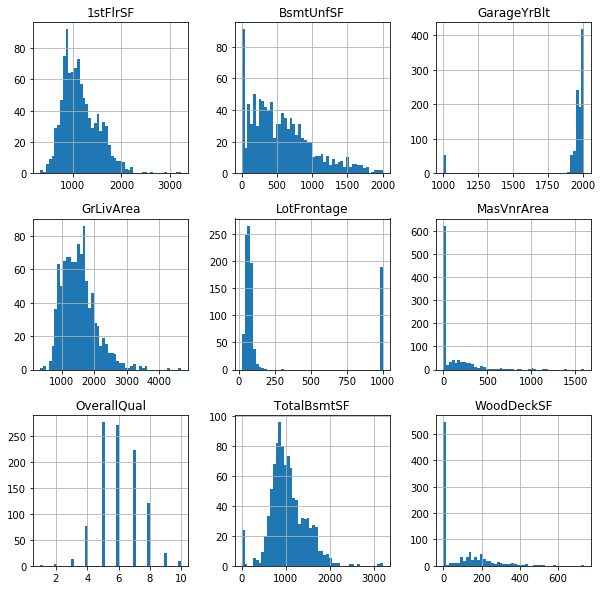

In [12]:
# exploremos las distribuciones de las variables luego de la sustitución
X_train.hist(bins=50, figsize=(10,10))
plt.show()

La variable LotFrontAge tiene una barra alta en el valor de 999 en el histograma, que aparece luego de la imputación. Tambien se puede observar el efecto en la variable GarageYrBlt, con la barra a la izquierda del valor 999.

**ADVERTENCIA**: recuerda ser cuidadoso con el orden de las columnas que pasas a la función, como lo discutimos en el notebook anterior.


### SimpleImputer: diferentes métodos en diferentes variables

En algunas ocasiones, queremos implementar diferentes técnicas de imputación para las diferentes variables. 
Cómo podemos hacer esto usando el SimpleImputer de Scikit-learn?

Tenemos que utilizar otra clase llamada ColumnTransformer. 

**Nota** ColumnTransformer se encuentra en versión beta (a la fecha - 09/2019). Esto quiere decir que los desarrolladores pueden cambiar su forma de uso o incluso remover la clase. La implicación es que el código que escribas hoy, puede que no se pueda usar más adelante con las nuevas versiones de Scikit-learn. Usualmente esto es lo que sucede con paquetes open-source que ensayan nueva funcionalidad.

Más detalles sobre el ColumnTransformer en [Sklearn website](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)


In [13]:
# Separemos en segmentos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [14]:
# exploremos los valores nulos
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

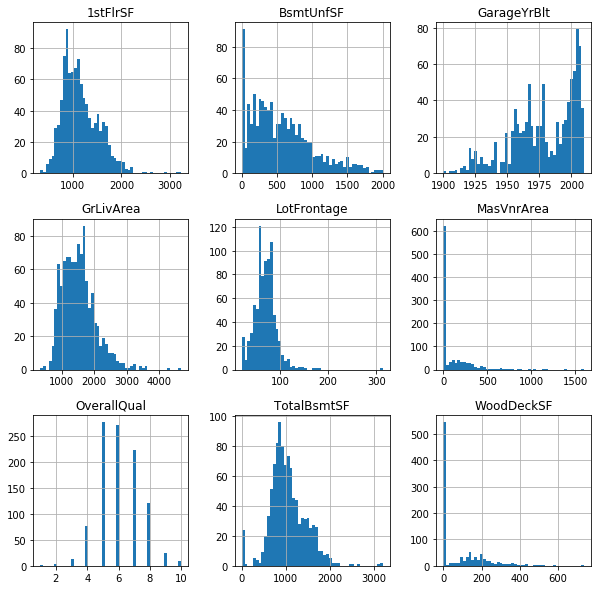

In [15]:
# Exploremos el cambio en las distribuciones para decidir 
# cual valor arbitrario seleccionar por cada variable

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Para este demo, vamos a sustituir los valores nulos en LotFrontage, MasVnrArea y GarageYrBlt con diferentes alores arbitrarios

In [16]:
# primero vamos a crear una lista, indicando cuales son las 
# variables a sustituir 
features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# luego vamos a instanciar imputers dentro de un pipeline
# creamos un imputer por cada variable
# indicando el valor arbitrario a sustituir
# ( este es diferente para cada variable)

imputer_LotFrontAge = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 999)),
])

imputer_MasVnrArea = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = -10)),
])

imputer_GarageYrBlt = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 1700)),
])

# luego ponemos las variables en una lista y los transformadores juntos
# usando la columna transformer

# en este ejemplo, usaremos los parámetros por defecto del ColumnTransformer
# remainder = drop, que significa que solo las variables sustituidas serán retenidas
# y el resto se descartan

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', imputer_LotFrontAge, features_LotFrontAge),
    ('imputer_MasVnrArea', imputer_MasVnrArea, features_MasVnrArea),
    ('imputer_GarageYrBlt', imputer_GarageYrBlt, features_GarageYrBlt)
],remainder = 'drop')

In [17]:
# ajustemos el preprocessor
preprocessor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('imputer_LotFrontAge',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=999,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0))],
                                          verbose=False),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 Pipeline(memory=...
         

In [19]:
# exploremos el transformer :

preprocessor.transformers

[('imputer_LotFrontAge', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=999,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['LotFrontage']),
 ('imputer_MasVnrArea', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=-10,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['MasVnrArea']),
 ('imputer_GarageYrBlt', Pipeline(memory=None,
           steps=[('imputer',
                   SimpleImputer(add_indicator=False, copy=True, fill_value=1700,
                                 missing_values=nan, strategy='constant',
                                 verbose=0))],
           verbose=False), ['GarageYrBlt'])]

In [20]:
# exploremos los parámetros aprendidos asi:

# para LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].named_steps['imputer'].statistics_

array([999.])

In [21]:
# para MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].named_steps['imputer'].statistics_

array([-10.])

In [22]:
# para GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].named_steps['imputer'].statistics_

array([1700.])

In [23]:
# ahora podemos sustituir los datos
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observemos como los datos devueltos contienen solo 3 variables, las que usamos explícitamente para la sustitución de valores. Este es el efecto de fijar el parámetro remainder='drop' en el ColumnTransformer.

**OTRA ADVERTENCIA**

ColumnTransformer simplemente selecciona (operación conocida como 'slicing' en inglés) las columnas requeridas para la sustitución y luego el SimpleImputer opera en aquella selección del dataframe. Si diferentes columnas (o features) son requeridas con diferentes métodos de sustitución, ColumnTransformer selecciona del dataframe las columnas requeridas por cada sustitución y luego las concatena para producir el resultado final.

En nuestro ejemplo, sucede lo siguiente:

- ColumnTransformer primero crea un dataframe con las tres columnas predefinidas LotFrontage, MasVnrArea y GarageBlt
- El SimpleImputers aprende los parámetros para cada uno de los 'sliced dataframes' o dataframes seleccionados 
    - En este caso, ningun parámetro es aprendido, ya que hemos especificado el valor a reemplazar
- ColunmnTransformer concatena de vuelta todos los dataframes en el resultado final

En ese caso, no obtendremos todas las variables del original X_train, ya que fijamos el parametro remainder='drop' en el ColumnTransformer!! 

Existe el riesgo, de cambiar el orden de las variables si no usamos los transfomadores como parte de un pipeline, y estamos atentos del orden de las variables en el segmento de entrenamiento, antes de convertirlo en un numpy arrays.

In [24]:
# veamos como el resultado de la sustitución es un dataframe de tres columnas
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


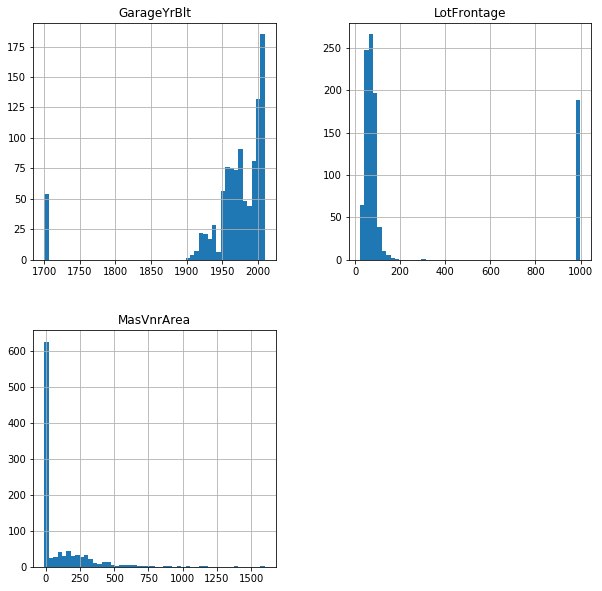

In [23]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Nota las barras correspondientes a los valores arbitrarios 700, 999 y -1 por cada variable.